# Medical Cost Personal Insurance Project
Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to
an illness. These expenses could be related to hospitalisation costs, cost of medicines
or doctor consultation fees. The main purpose of medical insurance is to receive the
best medical care without any strain on your finances. Health insurance plans offer
protection against high medical costs. It covers hospitalization expenses, day care
procedures, domiciliary expenses, and ambulance charges, besides many others.
Based on certain input features such as age , bmi,,no of dependents ,smoker ,region
medical insurance is calculated .
Columns
 age: age of primary beneficiary
 sex: insurance contractor gender, female, male
 bmi: Body mass index, providing an understanding of body, weights that are
relatively high or low relative to height, objective index of body weight (kg / m ^ 2)
using the ratio of height to weight, ideally 18.5 to 24.9.
 children: Number of children covered by health insurance / Number of
dependents
 smoker: Smoking
 region: the beneficiary&#39;s residential area in the US, northeast, southeast,
southwest, northwest.
 charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-
Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv


In [1]:
# import necessary liabrary

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv'

# Load the dataset into a DataFrame
medicalData = pd.read_csv(url)

# Display the DataFrame
print(medicalData)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [3]:
# let check whether null persent or not
medicalData.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
# lets see the number of row and column
medicalData.shape

(1338, 7)

In [5]:
# lets check the info of the dataset
medicalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medicalData.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Exploratory data analysis

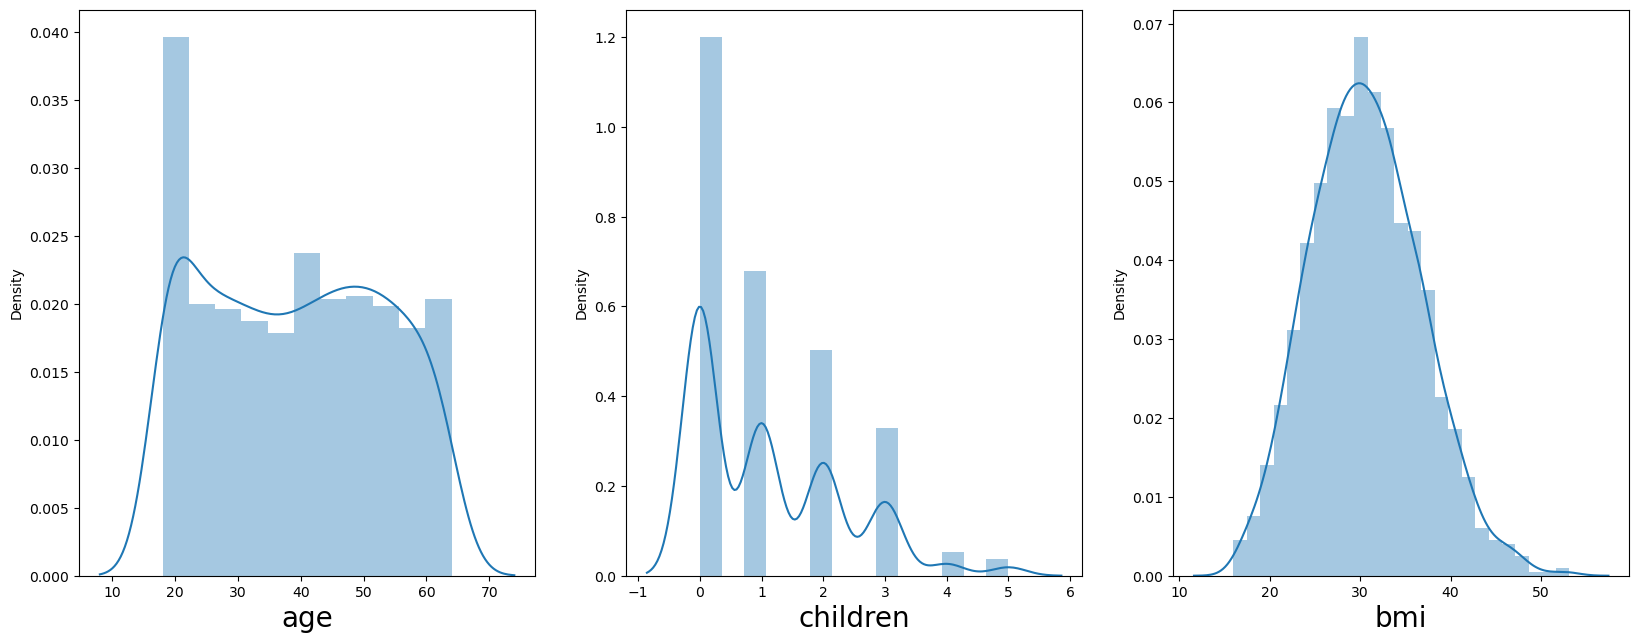

In [7]:
plt.figure(figsize=(20, 25))
plotnumber = 1
columns = ['age', 'children', 'bmi']  # List of columns to plot

for column in columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(medicalData[column])  
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.show()

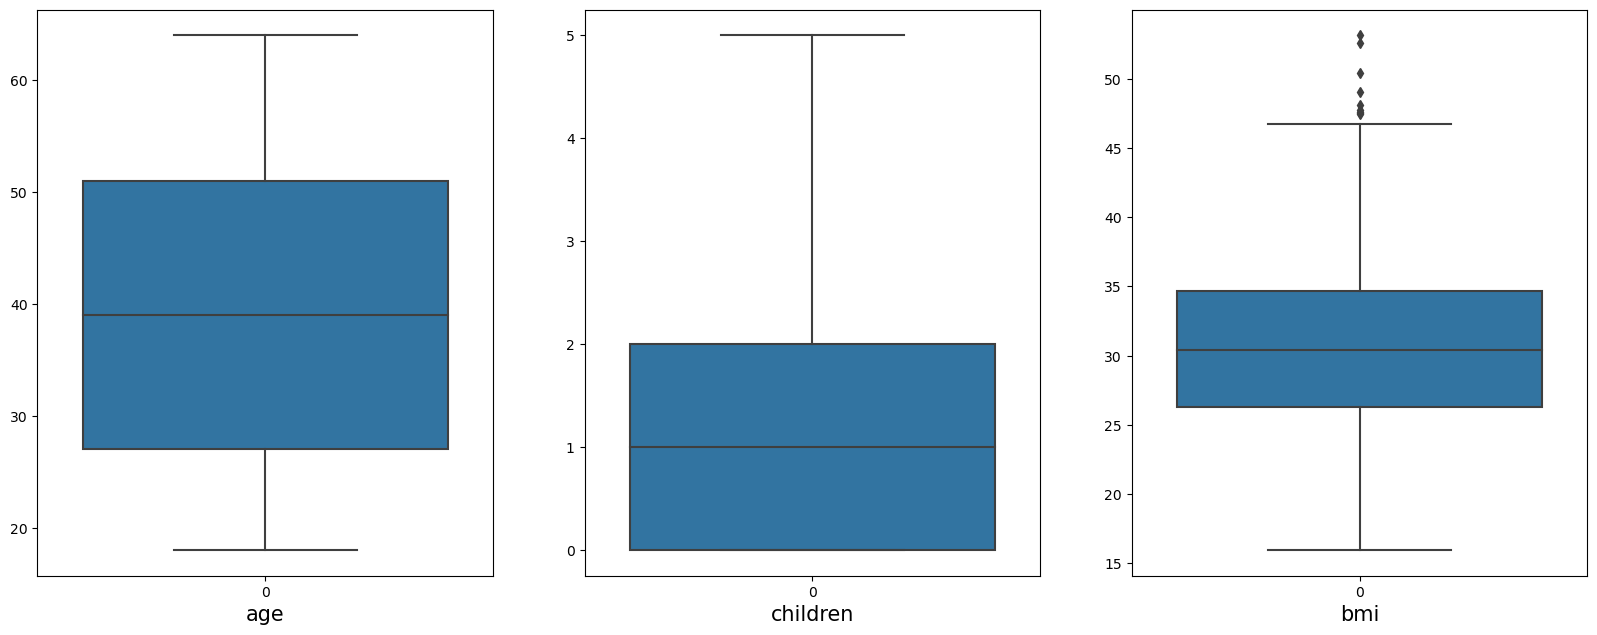

In [8]:
plt.figure(figsize=(20, 25))
columns = ['age', 'children', 'bmi']
graph = 1

for column in columns:
    if graph <= 5:
        plt.subplot(3, 3, graph)
        ax = sns.boxplot(data=medicalData[column])
        plt.xlabel(column, fontsize=15)
    graph += 1

plt.show()

bmi graph containing outlier so let fix it

In [9]:


# Define a function to handle outlier removal for multiple columns
def remove_outliers(medicalData, column):
    q1 = medicalData[column].quantile(0.25)
    q3 = medicalData[column].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower and upper limits for outliers
    low_limit = q1 - 1.5 * iqr
    high_limit = q3 + 1.5 * iqr
    
    # Find indices of outliers
    index = np.where((medicalData[column] < low_limit) | (medicalData[column] > high_limit))
    
    # Drop rows with outliers
    medical = medicalData.drop(medicalData.index[index])
    
    return medicalData

# List of columns to handle outliers
columns_to_check = ['age', 'children', 'bmi']  # Add more columns as needed

# Loop through each column and remove outliers
for col in columns_to_check:
    medicalData= remove_outliers(medicalData, col)

# Check the shape of the updated 'data' after removing outliers
data_shape = medicalData.shape

# Reset index of the 'data' dataframe
medicalData.reset_index(drop=True, inplace=True)


In [10]:
medicalData

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


as we see the outlier has been 9 removed lets recheck it

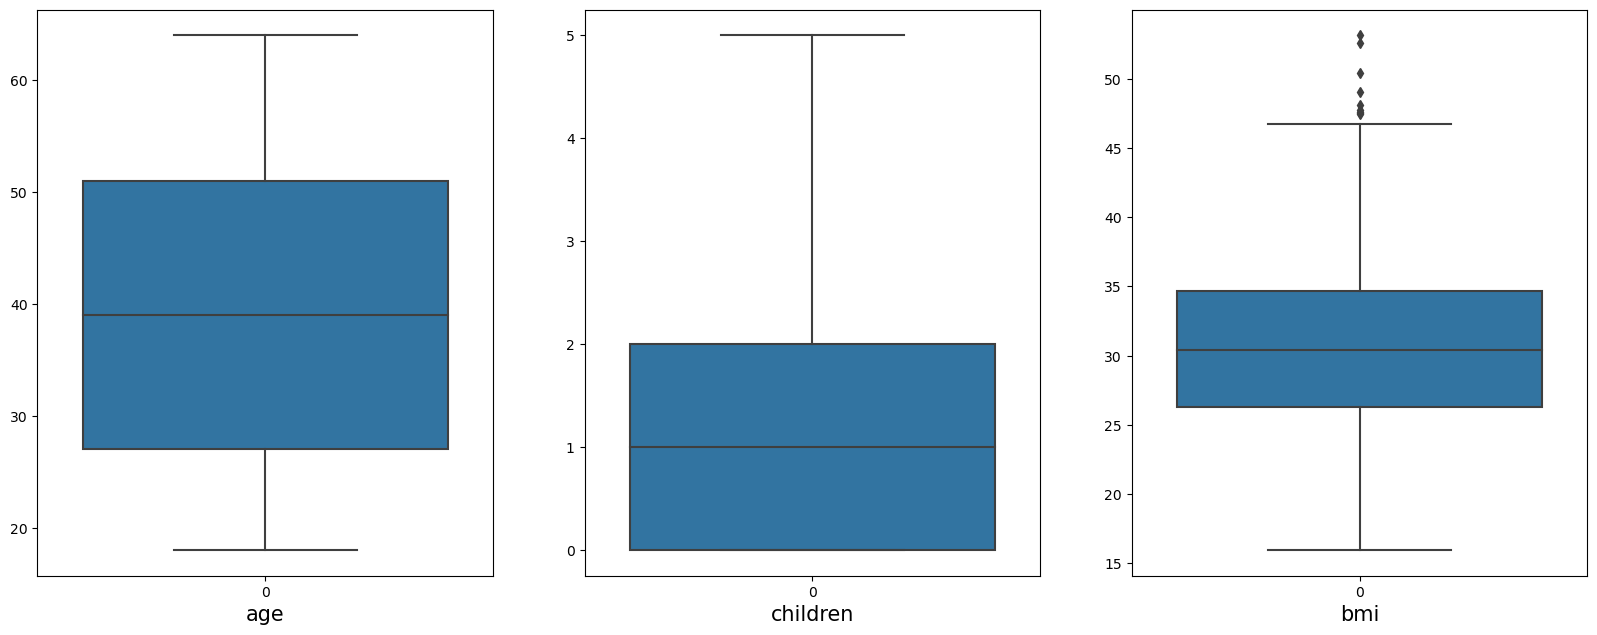

In [11]:
plt.figure(figsize=(20, 25))
columns = ['age', 'children', 'bmi']
graph = 1

for column in columns:
    if graph <= 5:
        plt.subplot(3, 3, graph)
        ax = sns.boxplot(data=medicalData[column])
        plt.xlabel(column, fontsize=15)
    graph += 1

plt.show()

now the outlier has been removed

In [12]:
medicalData.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


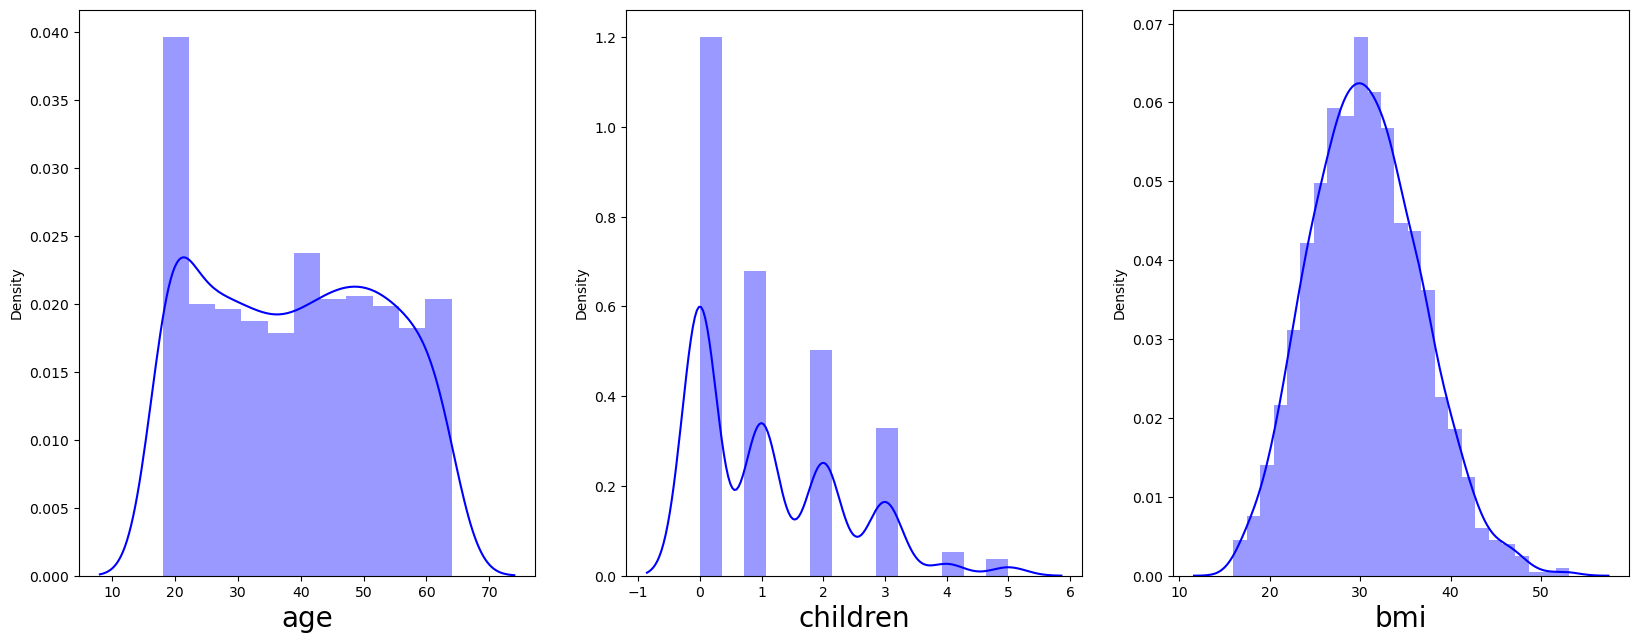

In [13]:
plt.figure(figsize=(20, 25))

plotnumber = 1
columns = ['age', 'children', 'bmi']  # List of columns to plot

for column in columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(medicalData[column], color='blue') 
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.show()

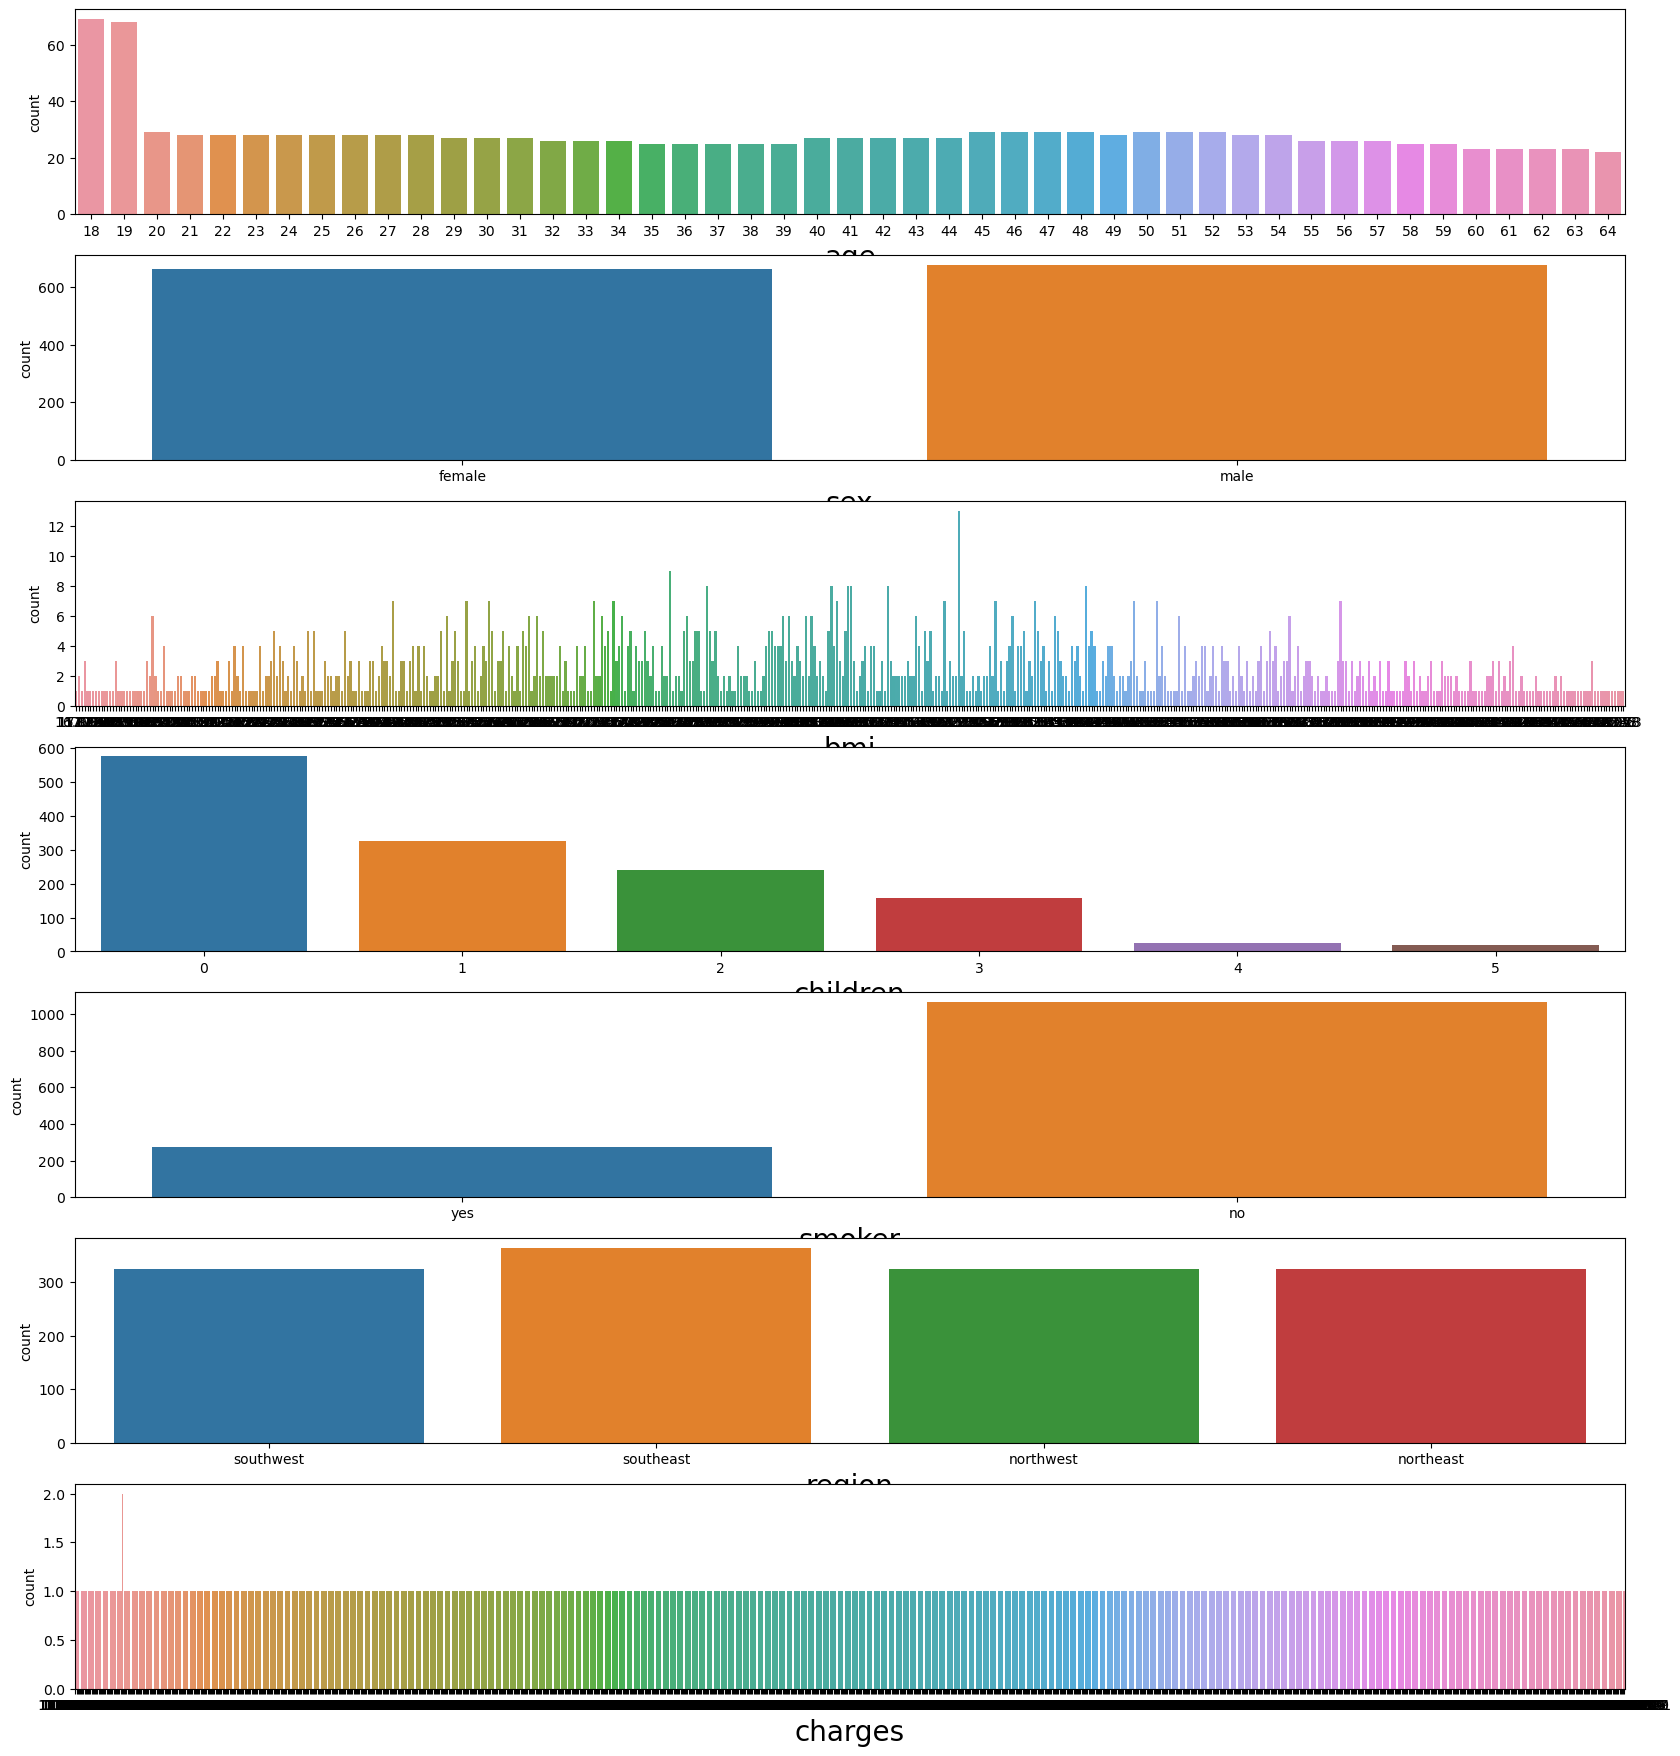

In [14]:
# lets see whether out dataset is balanced or not
plt.figure(figsize=(20, 25), facecolor='white')



plotnumber = 1
for column in medicalData.columns:
    if plotnumber <= 8:
        ax = plt.subplot(8, 1, plotnumber)
        sns.countplot(x=column, data=medicalData)
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.show()

# data preprocessing

ending the categorical features

In [15]:
medicalData.replace({'sex':{'male':0,'female':1}},inplace=True)
medicalData.replace({'smoker':{'yes':0,'no':1}},inplace=True)
medicalData.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [16]:
X=medicalData.drop(columns='charges',axis=1)
Y=medicalData['charges']

In [17]:
X


,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [18]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# train and test data

In [19]:
# data scaling formula Z=(X-mean)/std
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-1.43876426,  1.0105187 , -0.45332   , -0.90861367, -1.97058663,
        -0.40328924],
       [-1.50996545, -0.98959079,  0.5096211 , -0.07876719,  0.5074631 ,
        -1.28788104],
       [-0.79795355, -0.98959079,  0.38330685,  1.58092576,  0.5074631 ,
        -1.28788104],
       ...,
       [-1.50996545,  1.0105187 ,  1.0148781 , -0.90861367,  0.5074631 ,
        -1.28788104],
       [-1.29636188,  1.0105187 , -0.79781341, -0.90861367,  0.5074631 ,
        -0.40328924],
       [ 1.55168573,  1.0105187 , -0.26138796, -0.90861367, -1.97058663,
         1.36589436]])

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=355)

In [21]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1003, 6) (335, 6)


# model training

In [22]:
reg=LinearRegression()

In [23]:
reg.fit(X_train,Y_train)

LinearRegression()

# model evaluation

In [24]:
# check the R2
predicted_sales=reg.predict(X)
r2_score(Y,predicted_sales)*100

74.97776527651003

In [25]:
medicalData.sample(10)

,age,sex,bmi,children,smoker,region,charges
242,55,1,26.800,1,1,1,35160.13457
37,26,0,20.800,0,1,1,2302.30000
307,30,1,33.330,1,1,0,4151.02870
300,36,0,27.550,3,1,2,6746.74250
519,31,0,30.875,0,1,2,3857.75925
558,35,1,34.105,3,0,3,39983.42595
149,19,0,28.400,1,1,1,1842.51900
436,22,0,31.730,0,1,2,2254.79670
275,47,1,26.600,2,1,2,9715.84100
1142,52,1,24.860,0,1,0,27117.99378


In [26]:
# since we have already fit the scaler you can transform the data
print('Medical_cost-',reg.predict(scaler.transform([[18,1,41.240,0,0,1]])))

Medical_cost- [57515.67438809]


In [27]:
# predicting test data with the model
Y_test_pred=reg.predict(X_test)

In [28]:
# model evaluation
accuracy= metrics.r2_score(Y_test,Y_test_pred)
print('R square score:',accuracy)

R square score: 0.7153297173409907


# as you see the accuracy is very low so lets use randimizedSearchCV

# hyperparameter tuning using RandimizedSearchCV

In [29]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

In [30]:
ada=AdaBoostRegressor()

In [31]:
params={'n_estimators':[47,50,60,70],'learning_rate':[0.19,0.35,0.40]}

In [32]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [33]:
rnd_srch.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.19, 0.35, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [34]:
ada=AdaBoostRegressor(learning_rate=0.35,n_estimators=47)
ada.fit(X_train,Y_train)
y_pred=ada.predict(X_test)
print('****accuracy post tuning*********')

print(metrics.r2_score(Y_test,y_pred))

****accuracy post tuning*********
0.8098616689863769


In [35]:
# Get input data from the user for 6 features
input_data = input("Enter 6 features separated by spaces: ")
input_data_list = input_data.split()  # Split the input into a list of strings

try:
    # Convert input data to a numpy array and reshape for 11 features
    input_data_as_numpy_array = np.asarray(input_data_list, dtype=float).reshape(1, -1)

    # Make prediction using the RandomForestClassifier model
    prediction = ada.predict(input_data_as_numpy_array)
    print(prediction)
    print('insurance cost in usd',prediction[0])
except ValueError:
    print("Error: Input data must be numeric. Please enter numeric values separated by spaces.")

Enter 6 features separated by spaces: 1 2 3 4 5 6
[7649.66274026]
insurance cost in usd 7649.662740256413
